In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as matplot
import matplotlib.pyplot as plt

import os

In [2]:
train_set = pd.read_csv("./train.csv")
test_set = pd.read_csv("./test.csv")

In [3]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
"""Check the null"""
print(train_set.isnull().sum())
print('_'*40)
print(test_set.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


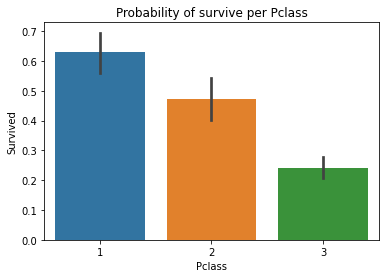

In [5]:
sns.barplot(data = train_set, x = "Pclass", y = "Survived").set_title("Probability of survive per Pclass")
train_set[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


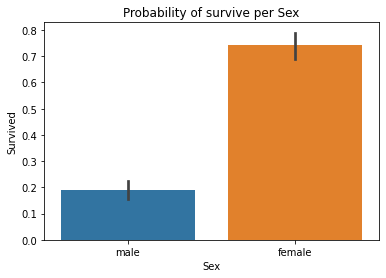

In [6]:
sns.barplot(data = train_set, x = "Sex", y = "Survived").set_title("Probability of survive per Sex")
train_set[["Sex","Survived"]].groupby(["Sex"],as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


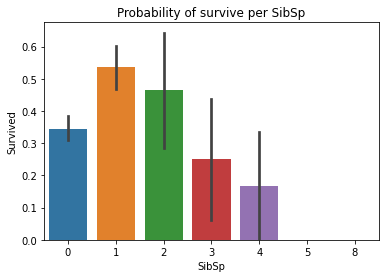

In [7]:
sns.barplot(data = train_set, x = "SibSp", y = "Survived").set_title("Probability of survive per SibSp")
train_set[["SibSp","Survived"]].groupby(["SibSp"],as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


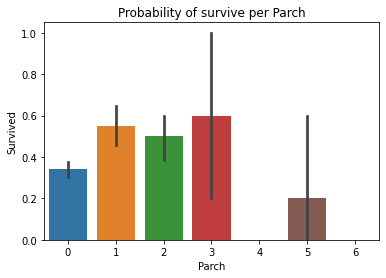

In [8]:
sns.barplot(data = train_set, x = "Parch", y = "Survived").set_title("Probability of survive per Parch")
train_set[["Parch","Survived"]].groupby(["Parch"],as_index = False).mean()

c:\users\zipel\anaconda3\envs\l4d2\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\zipel\anaconda3\envs\l4d2\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


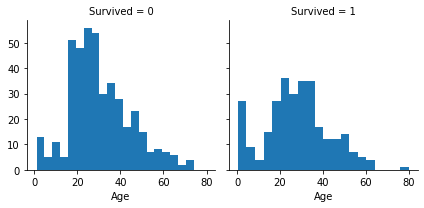

In [9]:
g = sns.FacetGrid(train_set, col = "Survived")
# x축을 20(bins)개로 나눠서 출력
g.map(plt.hist, 'Age',bins = 20)

c:\users\zipel\anaconda3\envs\l4d2\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\zipel\anaconda3\envs\l4d2\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


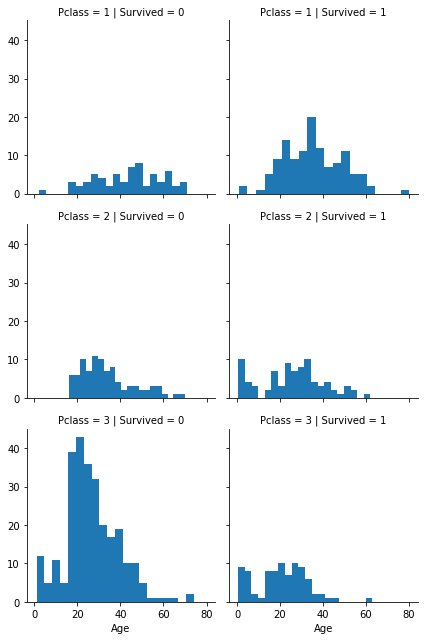

In [10]:
g = sns.FacetGrid(train_set, col = "Survived", row = "Pclass")
# x축을 20(bins)개로 나눠서 출력
g.map(plt.hist, 'Age', bins = 20)

c:\users\zipel\anaconda3\envs\l4d2\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\zipel\anaconda3\envs\l4d2\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


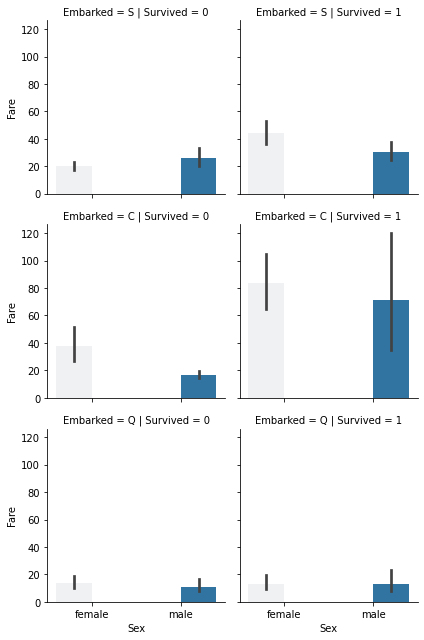

In [11]:
g = sns.FacetGrid(train_set, col = "Survived", row = "Embarked")
# x축을 20(bins)개로 나눠서 출력
g.map(sns.barplot, "Sex", "Fare","Sex")

In [12]:
train_set = train_set.drop(["Ticket","Cabin"],axis = 1)
test_set = test_set.drop(["Ticket","Cabin"],axis = 1)

data_set = [train_set,test_set]

In [13]:
for dataset in data_set:
    dataset["Title"] = dataset.Name.str.extract("([A-z]+)\.",expand = False)

In [14]:
pd.crosstab(train_set["Title"],train_set["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [15]:
for dataset in data_set:
    dataset["Title"] = dataset["Title"].replace(["Capt","Col","Countess","Don","Dr","Jonkheer","Lady","Major","Rev","Sir"],"Rare")
    
    dataset["Title"] = dataset["Title"].replace(["Mlle","Ms"],"Miss")
    dataset["Title"] = dataset["Title"].replace(["Mme"],"Mr")
    
train_set[["Title","Survived"]].groupby(["Title"],as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.158301
3,Mrs,0.792000
4,Rare,0.347826


In [16]:
title_mapping = {"Mr":1,"Ms":2,"Miss":3,"Master": 4,"Rare": 5}
for dataset in data_set:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)

In [17]:
train_set = train_set.drop(["Name","PassengerId"],axis = 1)
test_set = test_set.drop(["Name","PassengerId"],axis = 1)

data_set = [train_set,test_set]

In [18]:
for dataset in data_set:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})

# 결측치 처리

앞서 처리한 데이터들을 활용하여 결측치를 처리한다.
결측치를 제거하면 많은 비율의 데이터가 삭제되므로, 결측치를 다른 데이터를 활용하여 예측한다.


## 나이 결측치 처리

나이에 대한 결측치는 성별과 Pclass를 이용하여 예측한다.


In [19]:
guess_ages = np.zeros((2,3))
for dataset in data_set:
    for i in range(2):
        for j in range(3):
            
            guess_df = dataset[ (dataset["Sex"] == i) & (dataset["Pclass"]== j+1)]["Age"].dropna()
            
            age_guess = guess_df.median()
            
            guess_ages[i,j] = int(age_guess/0.5+0.5)*0.5
    
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset["Age"].isnull())& (dataset.Sex == i) & (dataset.Pclass == j+1),"Age"] = guess_ages[i,j]
    
    dataset["Age"] = dataset["Age"].astype(int)

train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,0.0
2,1,3,1,26,0,0,7.9250,S,3.0
3,1,1,1,35,1,0,53.1000,S,0.0
4,0,3,0,35,0,0,8.0500,S,1.0


## Embarked 결측치 처리

Embarked 데이터는 Fare와 많은 연관이 있으므로, Fare를 활용하여 Embarked 데이터를 예측한다.  
각 Embarked, 생존 여부 별 Fare의 Mean 값을 구하고, 가장 가까운 Embarked 값을 대입한다

In [20]:
train_set[["Fare","Embarked","Survived"]].groupby(["Embarked","Survived"],as_index = False).mean()

,Embarked,Survived,Fare
0,C,0,35.443335
1,C,1,79.720926
2,Q,0,13.335904
3,Q,1,13.182227
4,S,0,20.743987
5,S,1,39.547081


In [21]:
train_set[train_set["Embarked"].isnull()][["Fare","Survived"]]

,Fare,Survived
61,80.0,1
829,80.0,1


### 결측치 Embarked 예측

두 Null 값에 대해 Fare 의 값이 80 이고 생존 하였으므로, 평균적으로 가장 높은 배값을 낸 C의 가능성이 높음
  

In [22]:
train_set.loc[train_set["Embarked"].isnull(),"Embarked"] = "C"

## Fare 결측치 처리

Test 데이터 셋에서 Fare의 결측치가 하나 있으므로, 위에서 사용한 방법과 같이 Embarked를 활용하여 Fare를 예측한다.  

In [23]:
test_set[test_set["Fare"].isnull()][["Embarked"]]

,Embarked
152,S


In [24]:
test_set.loc[test_set["Fare"].isnull(),"Fare"] = 30

In [25]:
train_set.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [26]:
test_set.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [27]:
for dataset in data_set:
    dataset["Embarked"] = dataset["Embarked"].map({"Q": 0, "S": 1,"C": 2})
    
train_set.head()
test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34,0,0,7.8292,0,1.0
1,3,1,47,1,0,7.0000,1,0.0
2,2,0,62,0,0,9.6875,0,1.0
3,3,0,27,0,0,8.6625,1,1.0
4,3,1,22,1,1,12.2875,1,0.0


# 기존의 정보를 이용한 추가적인 정보 생성

기존의 데이터들을 이용하여 연관성이 correlation 이 존재하는 데이터를 모아주거나 의미 있는 데이터로 변환

In [28]:
train_set[["SibSp","Survived"]].groupby("SibSp",as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [29]:
train_set[["Parch","Survived"]].groupby("Parch",as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [30]:
for dataset in data_set:
    dataset["FamilyNum"] = dataset["SibSp"]+dataset["Parch"]

train_set[["FamilyNum","Survived"]].groupby("FamilyNum",as_index = False).mean()


,FamilyNum,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


In [31]:
for dataset in data_set:
    dataset.loc[dataset["FamilyNum"]==0,"FamilyNum"] = 0
    dataset.loc[(dataset["FamilyNum"]>0)&(dataset["FamilyNum"]<4),"FamilyNum"] = 1
    dataset.loc[(dataset["FamilyNum"]>=4),"FamilyNum"] = 2

In [32]:
train_set[["FamilyNum","Survived"]].groupby("FamilyNum",as_index = False).mean()

,FamilyNum,Survived
0,0,0.303538
1,1,0.578767
2,2,0.161290


# 각 컬럼 별 정규화 (Normalization)

머신 러닝 정확도를 높이기 위해 각 컬럼별로 정규화 진행


In [37]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
 
train_set = pd.DataFrame(min_max_scaler.fit_transform(train_set.values),columns = train_set.columns)
test_set = pd.DataFrame(min_max_scaler.fit_transform(test_set.values),columns = test_set.columns)

# Classification

XGBoost를 이용한 분류

In [62]:
import xgboost

xgb = xgboost.XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4)

In [63]:
train_x, train_y = train_set.drop("Survived",axis = 1), train_set["Survived"]
test_x = test_set

In [64]:
xgb.fit(train_x,train_y)

c:\users\zipel\anaconda3\envs\l4d2\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
train_result = xgb.predict(train_x)
print("Accuracy for Train is ", np.mean(train_result == train_y))

Accuracy for Train is  0.9528619528619529


c:\users\zipel\anaconda3\envs\l4d2\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [78]:
result = pd.DataFrame({"PassengerId":list(range(892,1310)),"Survived":xgb.predict(test_x)}).astype(int)

c:\users\zipel\anaconda3\envs\l4d2\lib\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [79]:
result.to_csv("./submission.csv", index = False)